# Comparing Estimation Techniques: Sample Average and incremental approach Constant Step Size

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
class Bandit:

    def __init__(self, epsilon=0., step_size=0.1, sample_averages=None):
        #self.k = 10
        self.step_size = 0.1
        self.sample_averages = sample_averages
        self.indices = np.arange(10)
        self.time = 0
        self.q_true = 0
        self.average_reward = 0
        self.epsilon = epsilon


    def choose_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.indices)

        q_best = np.max(self.q_est)
        return np.random.choice(np.where(self.q_est == q_best)[0])


    def update_action_value(self, action):
        # generate the reward under N(real reward, 1)
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.time

        if self.sample_averages:
            self.q_est[action] += (reward - self.q_est[action]) / self.action_count[action]

        else:
            self.q_est[action] += self.step_size * (reward - self.q_est[action])
        return reward

In [8]:
def non_stationary(runs, time, bandits):
    rewards = np.zeros((2, runs, time))
    best_action_counts = np.zeros(rewards.shape)
    for i, bandit in enumerate(bandits):
        print("Bandit:", i)
        bandit.q_true = np.random.randn(10) + np.random.normal(0, 0.1)
        for r in range(runs):
            bandit.q_est = np.zeros(10)
            bandit.action_count = np.zeros(10)
            bandit.best_action = np.argmax(bandit.q_true)
            bandit.time = 0
            
            if r%100==0:
                print("Iterations:", r)
                
            for t in range(time):
                action = bandit.choose_action()
                reward = bandit.update_action_value(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
                
                
    mean_best_action_counts = best_action_counts.mean(axis=1)
    mean_rewards = rewards.mean(axis=1)
    return mean_best_action_counts, mean_rewards

Bandit: 0
Iterations: 0
Iterations: 100
Iterations: 200
Iterations: 300
Iterations: 400
Iterations: 500
Iterations: 600
Iterations: 700
Iterations: 800
Iterations: 900
Iterations: 1000
Iterations: 1100
Iterations: 1200
Iterations: 1300
Iterations: 1400
Iterations: 1500
Iterations: 1600
Iterations: 1700
Iterations: 1800
Iterations: 1900
Bandit: 1
Iterations: 0
Iterations: 100
Iterations: 200
Iterations: 300
Iterations: 400
Iterations: 500
Iterations: 600
Iterations: 700
Iterations: 800
Iterations: 900
Iterations: 1000
Iterations: 1100
Iterations: 1200
Iterations: 1300
Iterations: 1400
Iterations: 1500
Iterations: 1600
Iterations: 1700
Iterations: 1800
Iterations: 1900


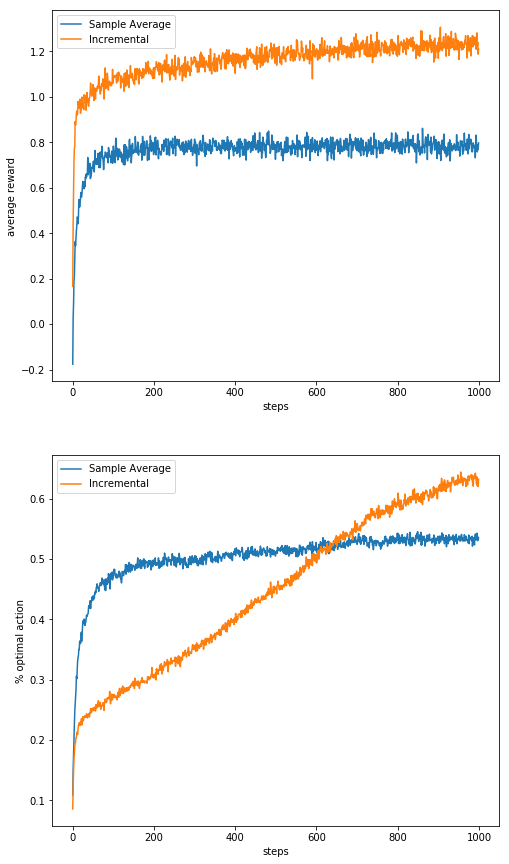

In [9]:
%matplotlib inline
runs, time=2000, 1000
bandits = [Bandit(epsilon=0.1, sample_averages=True), Bandit(epsilon=0.1, sample_averages=False)]
best_action_counts, rewards = non_stationary(runs, time, bandits)
plt.figure(figsize=(8, 15))

plt.subplot(2, 1, 1)
plt.plot(rewards[0], label='Sample Average')
plt.plot(rewards[1], label='Incremental')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(best_action_counts[0], label='Sample Average')
plt.plot(best_action_counts[1], label='Incremental')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()